In [14]:
import numpy as np
import pandas as pd

In [15]:
dataset = pd.read_csv('airbnb/reviews_detail.csv')

In [16]:
dataset.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,9452127,58944174,2016-01-05,6279455,Ravi,Great place. Helena was prompt to reply and ve...
1,9452127,59446510,2016-01-10,23770684,Shiv,We had previously stayed at the apartment over...
2,9452127,59557387,2016-01-11,29070567,Jandall,Helena was a great host and extremely accommod...
3,9452127,62664325,2016-02-15,58381183,Cody,Helena was extremely accessible throughout the...
4,9452127,63410004,2016-02-22,29014080,Magnus,Awesome place! Looks just as in photos. Plenty...


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801784 entries, 0 to 801783
Data columns (total 6 columns):
listing_id       801784 non-null int64
id               801784 non-null int64
date             801784 non-null object
reviewer_id      801784 non-null int64
reviewer_name    801784 non-null object
comments         800995 non-null object
dtypes: int64(3), object(3)
memory usage: 36.7+ MB


In [18]:
dataset['comments'].iloc[80:85].values

array(['Don hat für eine gute Anreise gesorgt und Fragen direkt beantwortet. \r\nDie Umgebung war perfekt, von dort aus war alles super zu erreichen (Supermarkt direkt nebenan)\r\nWenn man trotz Technolärm gut schlafen kann ist das Appartement für zwei Leute zu empfehlen.',
       'A clean stylish and conveniently located accommodation. Easy on-street parking nearby.',
       "Don was attentive and place was v. nice / extremely good location\n\nI'd come back!",
       'Don was a perfect host. nice, made our stay really nice and the apartment was in a great location. there were some noice during the first two nights from a night club (friday and saturday) but other than that is was perfect. ',
       'Communication before the stay was great, check-in and check-out was super easy and the appartment is located perfectly.\r\nIt gets really noisy on Friday and Saturday night (as stated) and the apartment is not really suitable for three people, unfortunately. It is too small for that, the c

In [19]:
dataset=dataset.dropna()

In [20]:
sampleData=dataset.iloc[:100000,:]

In [21]:
sampleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 0 to 100117
Data columns (total 6 columns):
listing_id       100000 non-null int64
id               100000 non-null int64
date             100000 non-null object
reviewer_id      100000 non-null int64
reviewer_name    100000 non-null object
comments         100000 non-null object
dtypes: int64(3), object(3)
memory usage: 5.3+ MB


In [22]:
inputData = sampleData.iloc[:,-1].values
inputData.item(0)

"Great place. Helena was prompt to reply and very helpful. Place has a great location short walk away from Times Square and is close to everything and anything you'll need! "

In [23]:
import re
import html.parser
def clean_data(textData):
    textData = re.sub(r'[?|$|.|!|\n|;|-|,|:|\d+]',r'',textData)
    textData = html.parser.unescape(textData)
    return textData

In [24]:
length = inputData.size
print("Review count",length)
for i in range(0,length):
    inputData[i] = clean_data(inputData.item(i))

Review count 100000


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=53,max_features=100,stop_words='english',ngram_range=(1,1))
feature_matrix = vectorizer.fit_transform(inputData.flatten())
print(feature_matrix.shape)

(100000, 100)


In [26]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters= 5, init='k-means++', random_state=0)
Y_out=model.fit_predict(feature_matrix)


In [27]:

import pandas as pd

X = pd.DataFrame(feature_matrix.toarray(), columns=vectorizer.get_feature_names())
print(X.head())

   accommodating  airbnb  amazing  apartment  area  arrival      away  \
0       0.000000     0.0      0.0   0.000000   0.0      0.0  0.375894   
1       0.000000     0.0      0.0   0.583010   0.0      0.0  0.000000   
2       0.415856     0.0      0.0   0.000000   0.0      0.0  0.000000   
3       0.000000     0.0      0.0   0.211531   0.0      0.0  0.000000   
4       0.409855     0.0      0.0   0.000000   0.0      0.0  0.000000   

   bathroom  beautiful  bed   ...     thank  thanks  time  train  très  \
0       0.0        0.0  0.0   ...       0.0     0.0   0.0    0.0   0.0   
1       0.0        0.0  0.0   ...       0.0     0.0   0.0    0.0   0.0   
2       0.0        0.0  0.0   ...       0.0     0.0   0.0    0.0   0.0   
3       0.0        0.0  0.0   ...       0.0     0.0   0.0    0.0   0.0   
4       0.0        0.0  0.0   ...       0.0     0.0   0.0    0.0   0.0   

       walk  walking  welcoming  wonderful     york  
0  0.355124      0.0        0.0   0.000000  0.00000  
1  0.000

In [28]:
X['Cluster'] = Y_out  # Add column corresponding to cluster number
word_frequencies_by_cluster = X.groupby('Cluster').sum()
word_frequencies_by_cluster=word_frequencies_by_cluster.sort_values(by=['amazing'],ascending=False)
print(word_frequencies_by_cluster)

         accommodating      airbnb      amazing    apartment         area  \
Cluster                                                                     
0           968.454329  979.309223  1238.556105   608.118656  1224.719009   
1           594.012467  425.276930   689.059643  7197.697099   900.604130   
2           475.851201  207.358568   379.427565   728.535948   440.998149   
3             0.294778   49.606138     2.064252    15.612621     3.571991   
4             2.720108    0.911551     1.459332     3.577627     0.843036   

             arrival         away     bathroom   beautiful          bed  \
Cluster                                                                   
0         442.704721  1071.656804  1126.280711  925.692594  1357.332407   
1         418.468903   761.691611   438.133114  688.077499   757.147788   
2         151.681864   244.697864   159.242609  209.119299   337.507313   
3           2.544960     3.417469     3.638693    2.918054     8.203217   
4        1

In [ ]:
# map rating to cluster label
X['Cluster'] = X['Cluster'].map({4: 1, 3: 2, 2: 3,1:4,0:5})
print(X.head())

In [ ]:
word_frequencies_by_cluster = X.groupby('Cluster').sum()
word_frequencies_by_cluster=word_frequencies_by_cluster.sort_values(by=['amazing'],ascending=False)
print(word_frequencies_by_cluster)

In [ ]:
sampleData['rating']=X.iloc[:,-1:].values
print(sampleData.head())


In [ ]:
sampleData.to_csv('predicted_rating_by_clustering.csv',columns=['listing_id','reviewer_id','rating'],index=False)
sampleData.info()


In [ ]:
d = pd.read_csv('predicted_rating_by_clustering.csv')
d.head()

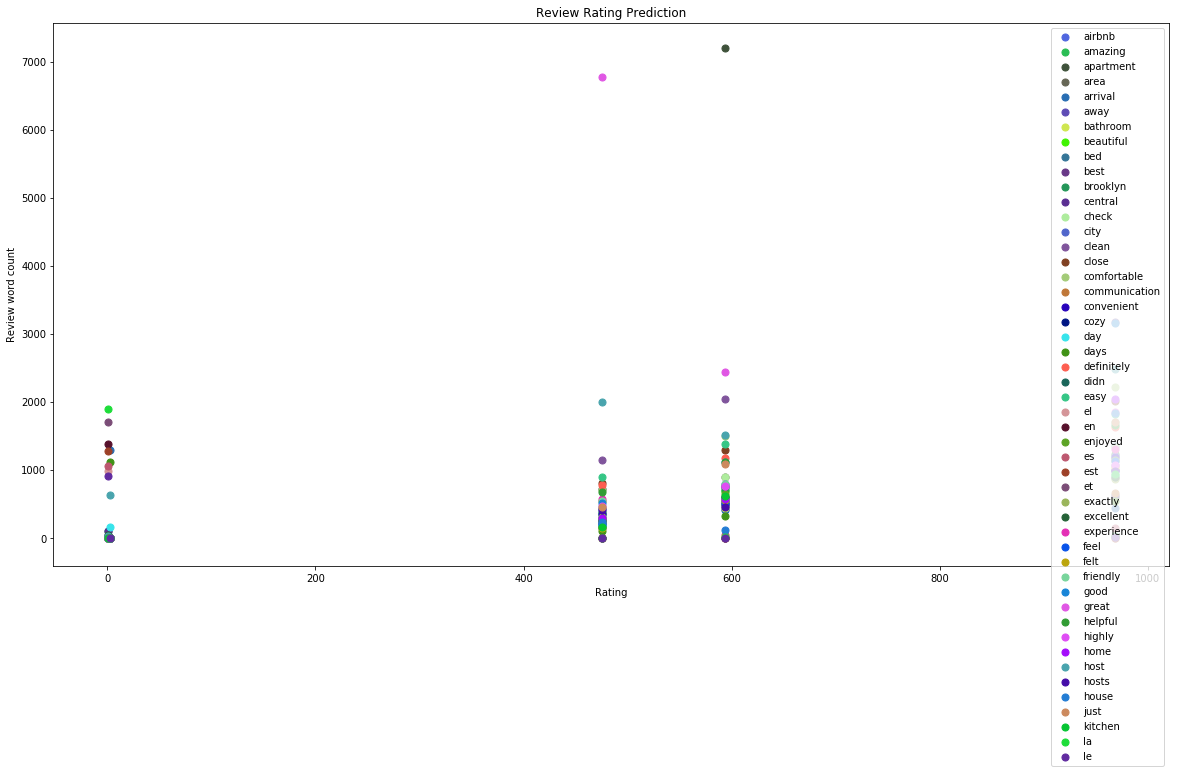

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
for j in range(2,51):
    plt.scatter(word_frequencies_by_cluster.iloc[:,0:1].values,word_frequencies_by_cluster.iloc[:,j-1:j].values, s = 50, c = np.random.rand(3,), label =X.columns[j-1])

plt.title('Review Rating Prediction')
plt.xlabel('Rating')
plt.ylabel('Review word count')
plt.legend()
plt.show()

<Figure size 576x432 with 0 Axes>

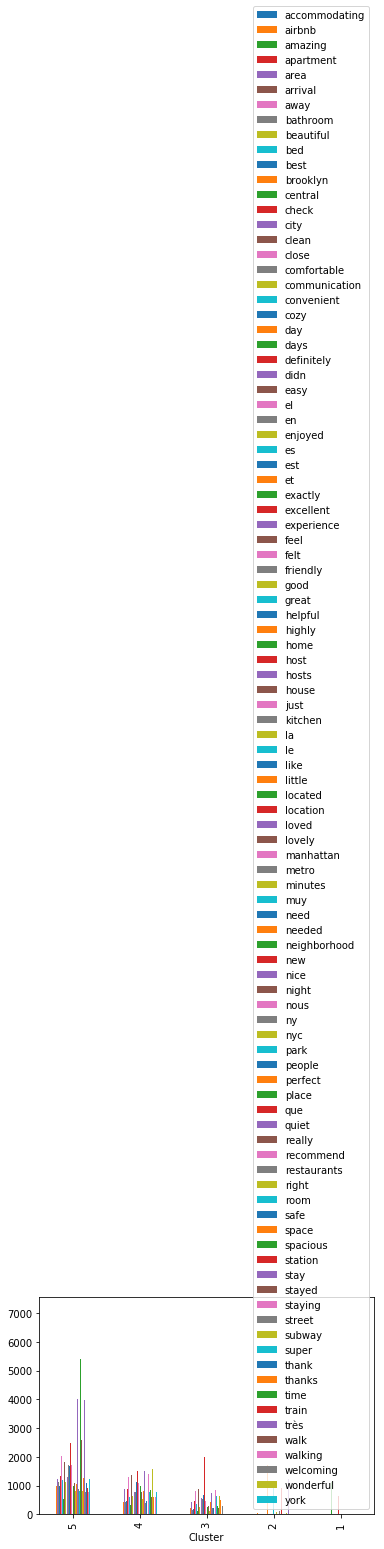

In [63]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
word_frequencies_by_cluster.plot.bar(ylim=0)
plt.show()

<class 'pandas.core.frame.DataFrame'>


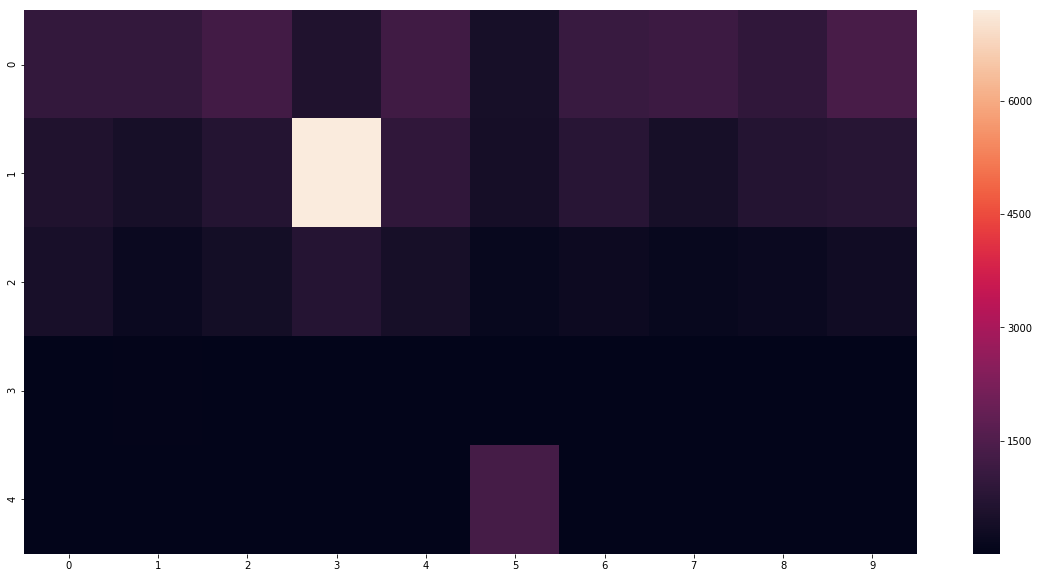

In [64]:
import seaborn as sns
fig = plt.figure(figsize=(20,10))
print(type(word_frequencies_by_cluster))
df = word_frequencies_by_cluster.iloc[:,0:10].values
sns.heatmap(df)
plt.show()

In [71]:
sampleData.iloc[0:50].to_csv("test_comments_data.csv",columns=['comments','rating'],index=False)